# 📌 **Description du Projet : Prédiction des Ventes pour un Retailer**

L’objectif de ce projet est de développer un **modèle de prédiction des ventes** pour un détaillant (**retailer**).  
La prévision des ventes est un enjeu crucial pour les entreprises car elle permet :  

- **d’optimiser les niveaux de stock**  
- **d’anticiper la demande des clients**  
- **d’améliorer la gestion de la chaîne d’approvisionnement**  
- **de soutenir la prise de décision stratégique**  

---

## 🔍 **Étapes principales du projet**

### 1. **Exploration et nettoyage des données**
- Analyse des données disponibles (**ventes historiques, produits, magasins, promotions, etc.**)  
- Traitement des valeurs manquantes et préparation des variables  

### 2. **Analyse exploratoire (EDA)**
- Visualisation des **tendances de ventes** au fil du temps  
- Étude de la **saisonnalité** et des variations régionales  
- Identification des **corrélations** entre variables (prix, promotions, périodes…)  

### 3. **Préparation des données pour le Machine Learning**
- **Encodage** des variables catégorielles  
- **Normalisation / standardisation** si nécessaire  
- **Division** en jeux d’entraînement et de test  

### 4. **Construction et entraînement du modèle**
- Test de plusieurs algorithmes (**régressions, CNN, LSTM, etc.**)  
- Sélection du modèle offrant la **meilleure performance**  

### 5. **Évaluation et interprétation**
- Mesure de la précision avec des **métriques** : RMSE, MAE, R²  
- Visualisation des résultats comparant les **ventes réelles** et les **ventes prédites** 

---

## 📦 **Bibliothèques utilisées**

### **1. os, datetime, warnings**
- **os** : gestion des fichiers et répertoires  
- **datetime** : manipulation des dates et temps  
- **warnings** : suppression/contrôle des messages d’avertissement  

### **2. Manipulation et visualisation des données**
- **pandas, numpy** : manipulation, nettoyage et transformation des données  
- **seaborn, matplotlib.pyplot** : visualisation graphique (EDA)  

### **3. Analyse de séries temporelles (statsmodels, pmdarima)**
- **adfuller** : test de stationnarité (ADF Test)  
- **seasonal_decompose** : décomposition en tendance, saisonnalité, bruit  
- **SARIMAX** : modélisation ARIMA/SARIMA avec facteurs exogènes  
- **plot_acf, plot_pacf** : autocorrélations  
- **auto_arima** : choix automatique des meilleurs paramètres ARIMA  

### **4. Prétraitement et Machine Learning (scikit-learn)**
- **MinMaxScaler, LabelEncoder** : mise à l’échelle et encodage  
- **train_test_split** : séparation train/test  
- **GridSearchCV** : recherche d’hyperparamètres  
- **mean_absolute_error, mean_squared_error, r2_score** : métriques d’évaluation  

### **5. Deep Learning (TensorFlow/Keras)**
- **Sequential, Model** : construction des modèles neuronaux  
- **Conv1D, MaxPooling1D, Flatten** : couches CNN  
- **LSTM, Bidirectional, RepeatVector, TimeDistributed** : couches RNN/LSTM  
- **Dense, Dropout, BatchNormalization** : couches fully-connected & régularisation  
- **Adam, RMSprop** : optimisateurs  
- **EarlyStopping** : arrêt anticipé pour éviter l’overfitting  
- **TimeseriesGenerator** : préparation des séquences temporelles  
- **MeanAbsoluteError, RootMeanSquaredError** : métriques pour réseaux de neurones  

### **6. Gradient Boosting (XGBoost)**
- **XGBRegressor** : algorithme de boosting performant pour la régression  

### **7. Sauvegarde des modèles**
- **joblib** : sérialisation et sauvegarde pour réutilisation future  

In [1]:
import os
import warnings

from statsmodels.stats.power import TTestIndPower

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Input, RepeatVector, TimeDistributed)
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Bidirectional
from keras.callbacks import Callback
from keras.metrics import MeanAbsoluteError, RootMeanSquaredError

from xgboost import XGBRegressor

import joblib

from datetime import datetime

warnings.filterwarnings("ignore", category=FutureWarning)

## 📂 **Chargement des jeux de données**

Dans cette étape, on charge les fichiers CSV qui contiennent les données nécessaires pour l’analyse et la modélisation.  

- **features.csv** : contient les **caractéristiques additionnelles** liées aux ventes (promotions, événements spéciaux, conditions économiques, etc.)  
- **stores.csv** : regroupe les informations sur les **magasins** (taille, type, localisation, etc.)  
- **train.csv** : contient les **données historiques de ventes** qui serviront à l’entraînement et à l’évaluation des modèltrain.csv")


In [26]:
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")
train_df = pd.read_csv("train.csv")

## 🔗 **Fusion des jeux de données**

Afin de travailler sur une base de données unique et complète, on fusionne les différents fichiers CSV.  



In [28]:
temp_df = pd.merge(train_df, features_df, on=["Store", "Date", "IsHoliday"], how="left")

merged_df = pd.merge(temp_df, stores_df, on="Store", how="left")

## 💾 **Exportation du jeu de données final**

Après la fusion des différents fichiers (`train.csv`, `features.csv`, `stores.csv`), on sauvegarde le **jeu de données complet** pour pouvoir le réutiliser facilement sans avoir à refaire toutes les étapes de préparation.  



In [29]:
merged_df.to_csv("Walmart_Weekly_Sales.csv", index=False)

## 📂 **Chargement du jeu de données final**

On charge le fichier **`Walmart_Weekly_Sales.csv`** qui contient les ventes hebdomadaires de Walmart, déjà fusionnées et nettoyées lors des étapes précédentes.  




In [2]:
data = pd.read_csv("Walmart_Weekly_Sales.csv")

## 👀 **Exploration initiale du dataset**

Avant de passer à l’analyse, on commence par examiner rapidement la structure du dataset.  

**data.head()**: Affiche les 5 premières lignes du dataset

**data.tail()**: Affiche les 5 dernières lignes du dataset

**data.shape**: Donne les dimensions du dataset (nb de lignes, nb de colonnes)


In [3]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [4]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


In [5]:
data.shape

(421570, 16)

## ⏳ **Tri du dataset par date**

Pour analyser correctement une **série temporelle**, il est essentiel que les données soient triées chronologiquement.  




In [6]:
data.sort_values(by="Date", inplace=True)

## 📝 **Informations générales sur le dataset**

On utilise la fonction **`info()`** pour obtenir un résumé global de la structure du DataFrame.  



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


### 🔹 Vérification des valeurs manquantes

ce bloc permet d’identifier les **valeurs manquantes** dans notre jeu de données.  
Cela est une étape essentielle du **nettoyage et de la préparation des données**, car les valeurs manquantes peuvent influencer négativement la performance des modèles de prédiction.  

- `data.isnull()` : crée un **masque booléen** indiquant les cellules contenant des valeurs manquantes (`True`) ou non (`False`).  
- `data.isnull().sum()` : **compte le nombre de valeurs manquantes** pour chaque colonne, ce qui nous permet de cibler les colonnes nécessitant un traitement spécifique (imputation, suppression, etc.).  




In [8]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

### 🔹 Traitement des valeurs manquantes pour les promotions

Certaines colonnes correspondant aux **promotions et réductions** (`MarkDown1` à `MarkDown5`) contiennent des valeurs manquantes.  
Ces colonnes représentent les **réductions appliquées sur les produits**, et l’absence de valeur signifie généralement **aucune promotion**.

Le code suivant permet de **remplacer les valeurs manquantes par 0**, ce qui est logique dans ce contexte, car une valeur manquante correspond à **aucune réduction appliquée** :




In [9]:
cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
data[cols] = data[cols].fillna(0)

### 🔹 Encodage des variables catégorielles

Certaines colonnes de notre jeu de données sont **catégorielles**, comme :  
- `IsHoliday` : indique si la date correspond à un jour férié (`True`/`False`)  
- `Type` : type de magasin

Les modèles de machine learning **ne peuvent pas traiter directement les valeurs textuelles**, il est donc nécessaire de **convertir ces catégories en nombres**.

Le code suivant utilise **LabelEncoder** pour transformer ces colonnes en valeurs numériques :



In [10]:
encod = LabelEncoder()
for cols in data[['IsHoliday', 'Type']]:
    data[cols] = encod.fit_transform(data[cols])

vérifions encore une fois si il y a encore des valeurs nulls 

In [11]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

Affichons les cinqs premiers lignes de notre dataset après les modifications précédentes

In [12]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
277665,29,5,2010-02-05,15552.08,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,1,93638
277808,29,6,2010-02-05,3200.22,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,1,93638
277951,29,7,2010-02-05,10820.05,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,1,93638
278094,29,8,2010-02-05,20055.64,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,1,93638


### 🔹 Analyse statistique des variables numériques

Avant d’entraîner un modèle de prédiction, il est important de **comprendre les caractéristiques statistiques des variables numériques**.  
Le code suivant permet d’obtenir un **résumé statistique** de toutes les colonnes numériques de notre dataset :




In [13]:
numeric_columns = data.select_dtypes(include='number')

numeric_columns.describe().round().T.style.bar(subset=['mean'], color='blue').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Store,421570.000000,22.000000,13.000000,1.000000,11.000000,22.000000,33.000000,45.000000
Dept,421570.000000,44.000000,30.000000,1.000000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,421570.000000,15981.000000,22711.000000,-4989.000000,2080.000000,7612.000000,20206.000000,693099.000000
IsHoliday,421570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Temperature,421570.000000,60.000000,18.000000,-2.000000,47.000000,62.000000,74.000000,100.000000
Fuel_Price,421570.000000,3.000000,0.000000,2.000000,3.000000,3.000000,4.000000,4.000000
MarkDown1,421570.000000,2590.000000,6052.000000,0.000000,0.000000,0.000000,2809.000000,88647.000000
MarkDown2,421570.000000,880.000000,5085.000000,-266.000000,0.000000,0.000000,2.000000,104520.000000
MarkDown3,421570.000000,468.000000,5529.000000,-29.000000,0.000000,0.000000,5.000000,141631.000000
MarkDown4,421570.000000,1083.000000,3895.000000,0.000000,0.000000,0.000000,425.000000,67475.000000


### 🔹 Visualisation des ventes hebdomadaires dans le temps

Il est crucial de **comprendre l’évolution des ventes au fil du temps** pour détecter des tendances, des pics saisonniers ou des anomalies.  
Le code suivant trace la **somme des ventes hebdomadaires** pour chaque date :



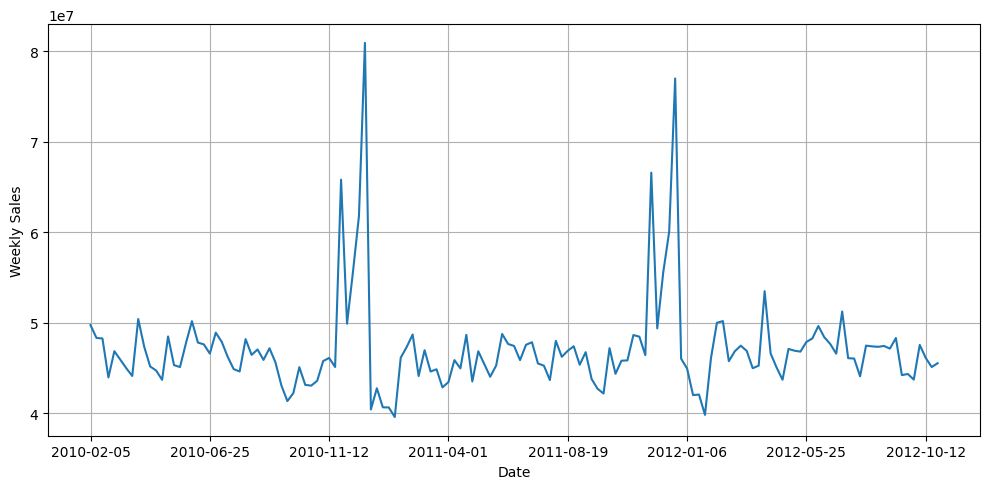

In [14]:
plt.figure(figsize=(10, 5))
data.groupby("Date")['Weekly_Sales'].sum().plot()
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid()
plt.tight_layout()
plt.show()

### 🔹 Distribution des ventes : semaines fériées vs non-fériées

Pour mieux comprendre l’impact des **jours fériés sur les ventes**, nous pouvons visualiser la distribution des ventes hebdomadaires à l’aide d’un **violin plot**.  
Cette visualisation montre **la densité et la dispersion des ventes** pour les semaines fériées et non-fériées.tight_layout()
plt.show()


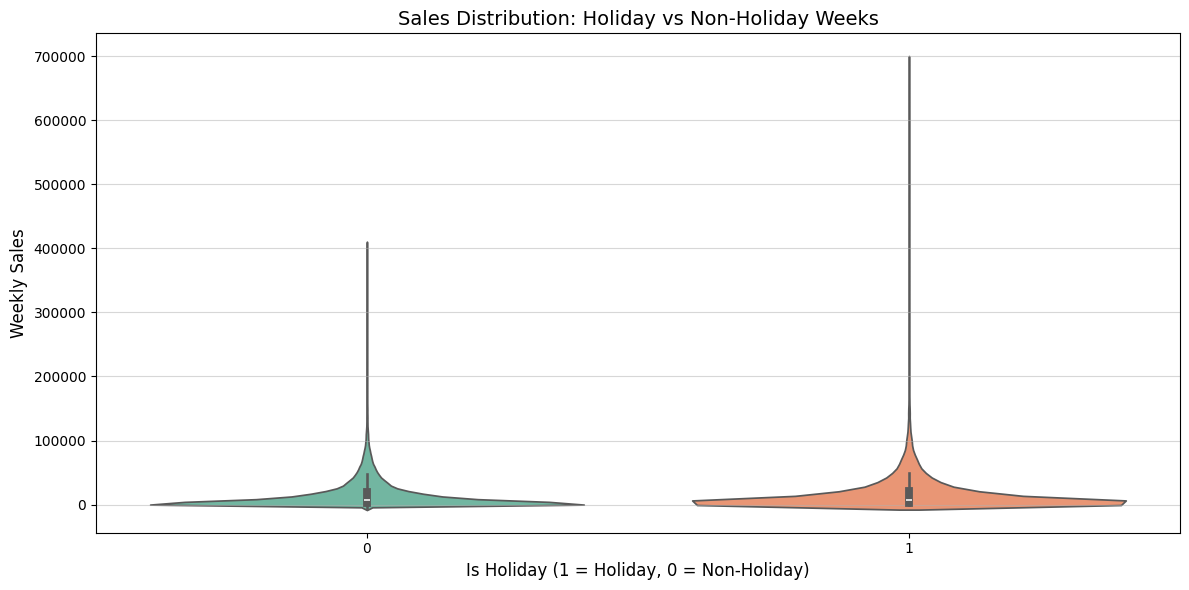

In [15]:
plt.figure(figsize=(12, 6))  


sns.violinplot(
    data=data,             
    x='IsHoliday',               
    y='Weekly_Sales',           
    hue='IsHoliday',            
    palette='Set2',             
    density_norm='width',       
    legend=False                
)

plt.title('Sales Distribution: Holiday vs Non-Holiday Weeks', fontsize=14)
plt.xlabel('Is Holiday (1 = Holiday, 0 = Non-Holiday)', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()


### 🔹 Ventes totales par magasin

Pour analyser la performance de chaque magasin, il est utile de **regrouper les ventes par store** et de visualiser le total des ventes hebdomadaires pour chacun.  
Cette visualisation permet d’identifier rapidement **les magasins les plus performants et ceux qui génèrent moins de ventes**.



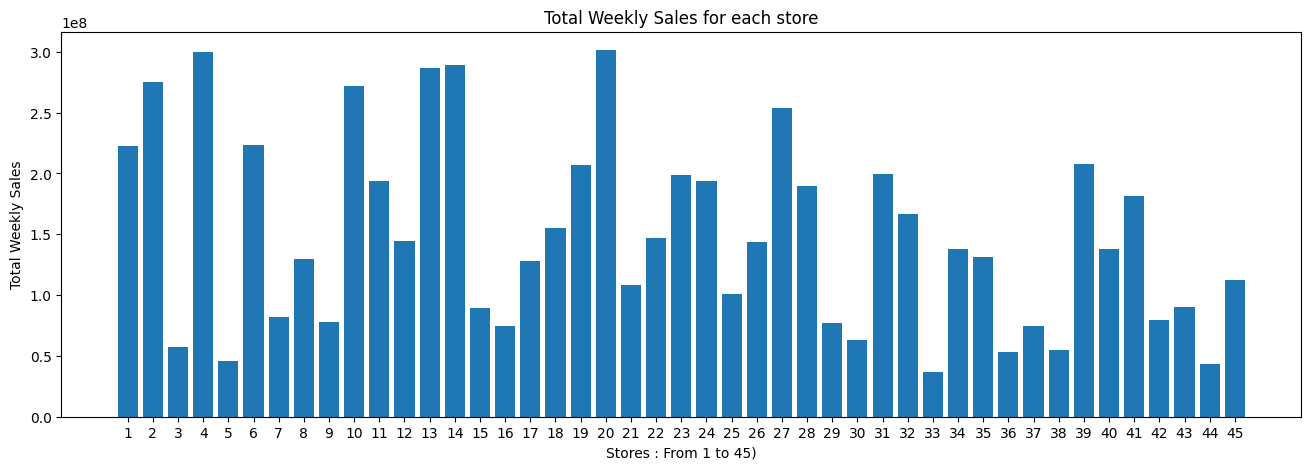

In [16]:
sales_by_store = data.groupby('Store')['Weekly_Sales'].sum()

plt.figure(figsize=(16, 5))
plt.bar(sales_by_store.index.astype(str), sales_by_store.values)

plt.xlabel("Stores : From 1 to 45)")
plt.ylabel("Total Weekly Sales")
plt.title("Total Weekly Sales for each store")
plt.show()

### 🔹 Ventes totales par département

Pour analyser la performance de chaque département, il est utile de **regrouper les ventes par département** et de visualiser le moyen des ventes hebdomadaires pour chacun.  
Cette visualisation permet d’identifier rapidement **les départements les plus performants et ceux qui génèrent moins de ventes**.



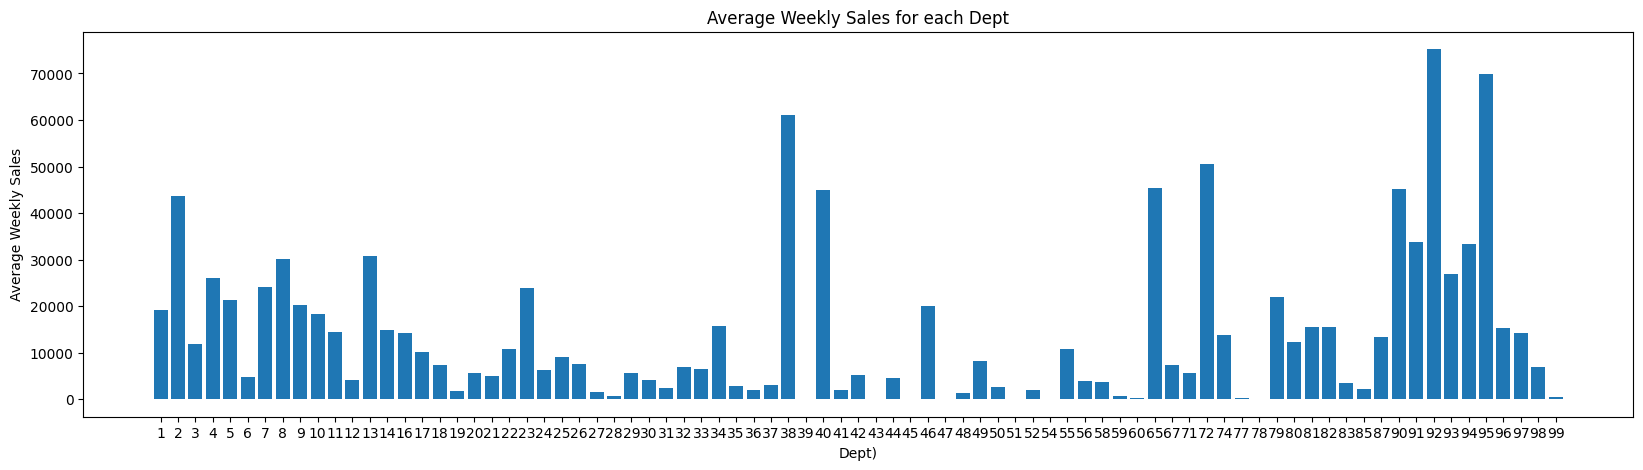

In [17]:
sales_by_dept_mean = data.groupby('Dept')['Weekly_Sales'].mean()

plt.figure(figsize=(20, 5))
plt.bar(sales_by_dept_mean.index.astype(str), sales_by_dept_mean.values)

plt.xlabel("Dept)")
plt.ylabel("Average Weekly Sales")
plt.title("Average Weekly Sales for each Dept")
plt.show()

### 🔹 Analyse des ventes mensuelles par année

Pour mieux comprendre la **saisonnalité et les tendances des ventes**, il est utile de **regrouper les ventes par mois et par année**.  
Cette visualisation permet de détecter des **périodes récurrentes de forte ou faible activitht_layout()
plt.show()


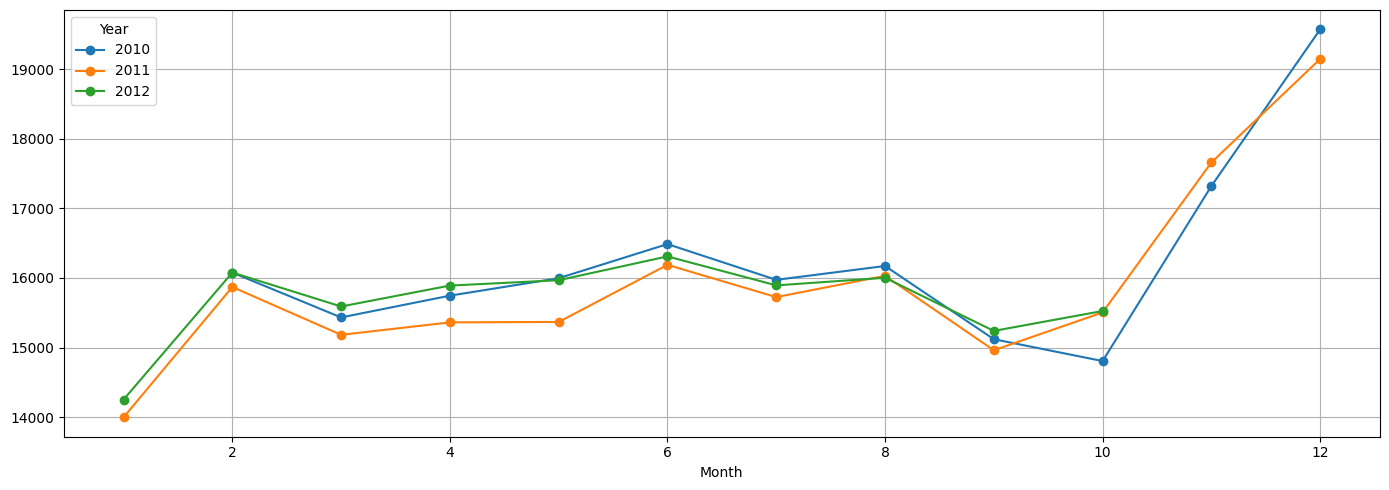

In [18]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

monthly_sales = pd.pivot_table(data, values='Weekly_Sales', columns='Year', index='Month')

plt.figure(figsize=(14,5))
monthly_sales.plot(ax=plt.gca(), marker='o')
plt.grid()
plt.tight_layout()
plt.show()

### 🔹 Matrice de corrélation des variables numériques

Pour comprendre les **relations entre les différentes variables numériques**, nous utilisons une **matrice de corrélation**.  
Cette analyse permet de détecter quelles variables sont **fortement liées aux ventes**, ce qui peut guider la sélection des features pour le modèle.




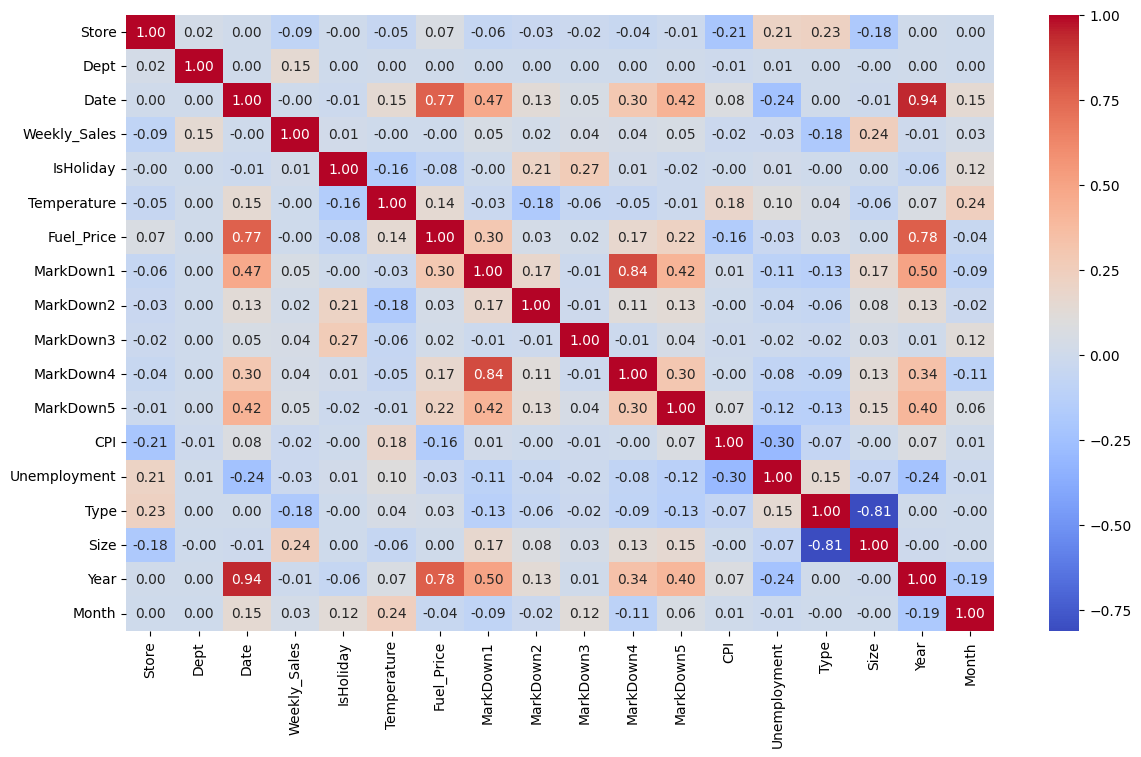

In [19]:
correlation = data.corr()

plt.figure(figsize=(14,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()

### 🔹 Extraction de la semaine de l'année

Pour analyser les ventes avec plus de précision temporelle, il est utile d’ajouter une colonne représentant la **semaine de l’année**.  
Cela permet d’étudier des **tendances hebdomadaires**, de détecter des **périodes de forte activité** et d’améliorer les modèles de prévision']].head()


In [20]:
data['Week'] = data['Date'].dt.isocalendar().week
data[['Year', 'Month', 'Week']].head()

,Year,Month,Week
0,2010,2,5
277665,2010,2,5
277808,2010,2,5
277951,2010,2,5
278094,2010,2,5


### 🔹 Normalisation des variables numériques

Pour préparer les données à l’entraînement des modèles de machine learning ou analyse des séries temporelles, il est souvent nécessaire de **mettre les variables numériques sur une même échelle**.  
Le code suivant applique une **normalisation Min-Max** aux colonnes continues importantes :



In [21]:
scaler = MinMaxScaler()
data[['Temperature', 'Fuel_Price','CPI', 'Unemployment']] = scaler.fit_transform(data[['Temperature', 'Fuel_Price','CPI', 'Unemployment']])

data[['Temperature', 'Fuel_Price','CPI', 'Unemployment']].head()

,Temperature,Fuel_Price,CPI,Unemployment
0,0.434149,0.050100,0.840500,0.405118
277665,0.258513,0.158317,0.054008,0.592774
277808,0.258513,0.158317,0.054008,0.592774
277951,0.258513,0.158317,0.054008,0.592774
278094,0.258513,0.158317,0.054008,0.592774


### 🔹 Détection des valeurs extrêmes dans les ventes hebdomadaires

Avant l’entraînement des modèles, il est important d’identifier les **valeurs extrêmes (outliers)** qui pourraient influencer négativement les prédictions.  
Le code suivant utilise un **boxplot** pour visualiser la distribution des ventes hebdomadaires :



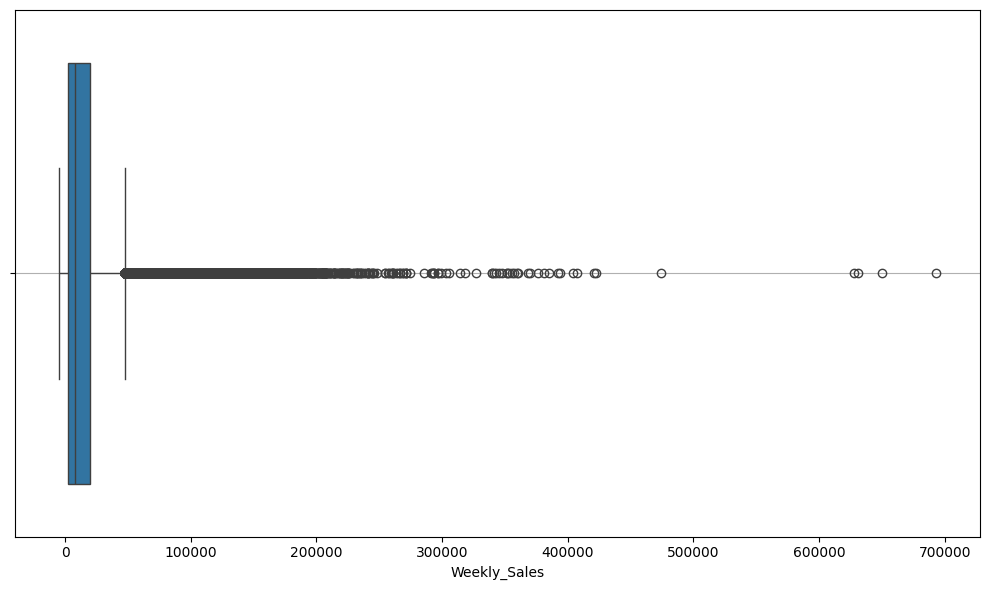

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Weekly_Sales'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 🔹 Traitement des valeurs extrêmes (outliers) pour les ventes hebdomadaires

Pour améliorer la robustesse des modèles de prédiction, il est important de **gérer les valeurs extrêmes**.  
Ce code utilise la méthode de l'**IQR (Interquartile Range)** pour détecter et limiter les outliers dans la colonne `Weekly_Sales` :


Nombre d'outliers : 35521


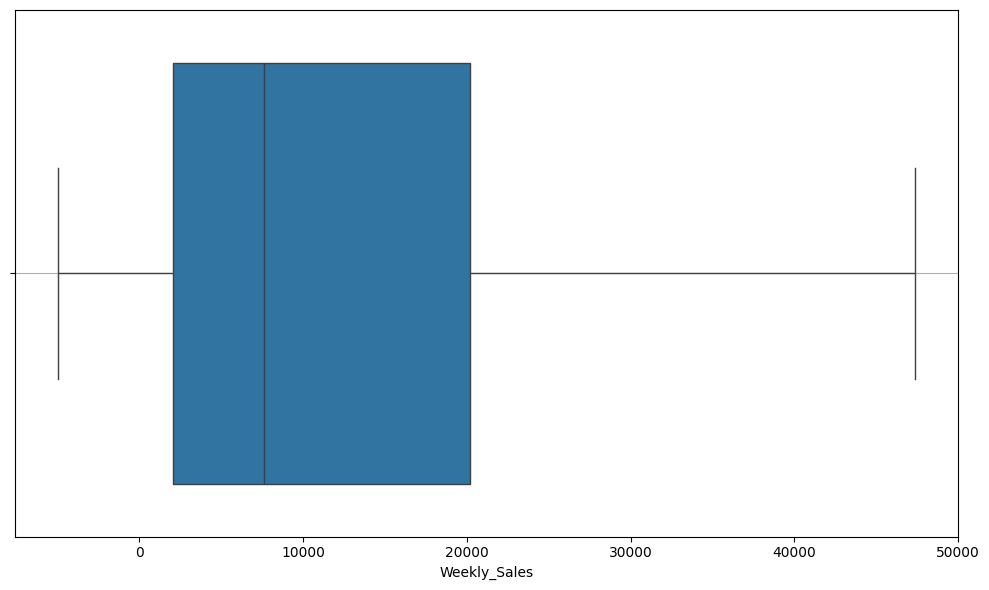

In [23]:
Q1 = data['Weekly_Sales'].quantile(0.25)
Q3 = data['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Weekly_Sales'] < Q1 - 1.5 * IQR) | (data['Weekly_Sales'] > Q3 + 1.5 * IQR)]

print("Nombre d'outliers :", len(outliers))


data['Weekly_Sales'] = data['Weekly_Sales'].clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

plt.figure(figsize=(10,6))
sns.boxplot(x=data['Weekly_Sales'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 🔹 Test de stationnarité avec l'Augmented Dickey-Fuller (ADF)

Avant de construire un modèle de séries temporelles, il est important de vérifier si la **série des ventes est stationnaire**.  
Une série stationnaire a une **moyenne et une variance constantes dans le temps**, ce qui est crucial pour certains modèles comme ARIMA.



In [24]:
results = adfuller(data.groupby('Date')['Weekly_Sales'].sum())

print(" Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic       : {results[0]}")
print(f"p-value             : {results[1]}")

print("\nCritical Values:")
for key, value in results[4].items():
    print(f"  {key} : {value:.4f}")

# Interprétation simple
if results[1] < 0.05:
    print("\n La série est stationnaire (p-value < 0.05)")
else:
    print("\n La série n'est pas stationnaire (p-value >= 0.05)")

 Augmented Dickey-Fuller Test Results:
ADF Statistic       : -6.648280901930839
p-value             : 5.198364612613561e-09

Critical Values:
  1% : -3.4786
  5% : -2.8827
  10% : -2.5781

 La série est stationnaire (p-value < 0.05)


### 🔹 Création de variables retardées (lags) pour les ventes hebdomadaires

Pour capturer les **dépendances temporelles** dans les séries de ventes, il est courant de créer des **variables retardées (lags)**.  
Ces variables représentent les **valeurs passées des ventes** et peuvent aider les modèles à prédire les ventes futures en se basant sur l’historiqunes avant


In [25]:
data['Weekly_Sales_lag_1'] = data['Weekly_Sales'].shift(1)
data['Weekly_Sales_lag_2'] = data['Weekly_Sales'].shift(2)
data['Weekly_Sales_lag_4'] = data['Weekly_Sales'].shift(4)

### 🔹 Création de moyennes mobiles et écarts-types glissants

Pour capturer les **tendances et la volatilité** des ventes hebdomadaires, nous pouvons utiliser des **moyennes mobiles (MA) et écarts-types mobiles (SD)**.  
Ces features permettent aux modèles de **détecter les tendances à court et moyen terme** ainsi que les fluctuations des ventes.




In [26]:
data['Weekly_Sales_MA_4'] = data['Weekly_Sales'].rolling(window=4).mean()
data['Weekly_Sales_SD_4'] = data['Weekly_Sales'].rolling(window=4).std()

data['Weekly_Sales_MA_8'] = data['Weekly_Sales'].rolling(window=8).mean()
data['Weekly_Sales_SD_8'] = data['Weekly_Sales'].rolling(window=8).std()

data[['Weekly_Sales_MA_4', 'Weekly_Sales_SD_4', 'Weekly_Sales_MA_8', 'Weekly_Sales_SD_8']].head(10) 

,Weekly_Sales_MA_4,Weekly_Sales_SD_4,Weekly_Sales_MA_8,Weekly_Sales_SD_8
0,NaN,NaN,NaN,NaN
277665,NaN,NaN,NaN,NaN
277808,NaN,NaN,NaN,NaN
277951,13624.2125,9090.950036,NaN,NaN
278094,12406.9975,7203.620162,NaN,NaN
16451,12460.7275,7235.628412,NaN,NaN
278237,12765.6050,6722.891144,NaN,NaN
278380,11948.2600,7218.724435,12786.23625,7652.111741
278523,8675.4025,4919.170204,10541.20000,6048.857499
278666,5307.0675,2425.411721,8883.89750,6291.269738


### 🔹 Création de variables pour les jours fériés spécifiques

Certains **jours fériés ont un impact significatif sur les ventes**, comme le Super Bowl, Labor Day, Thanksgiving et Christmas.  
Nous créons des colonnes booléennes pour chaque événement afin que le modèle puisse **capturer l’effet des jours fériés sur les ventes**.




        Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50          0     0.434149   
277665     29     5 2010-02-05      15552.08          0     0.258513   
277808     29     6 2010-02-05       3200.22          0     0.258513   
277951     29     7 2010-02-05      10820.05          0     0.258513   
278094     29     8 2010-02-05      20055.64          0     0.258513   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  Weekly_Sales_lag_2  \
0         0.050100        0.0        0.0        0.0  ...                 NaN   
277665    0.158317        0.0        0.0        0.0  ...                 NaN   
277808    0.158317        0.0        0.0        0.0  ...            24924.50   
277951    0.158317        0.0        0.0        0.0  ...            15552.08   
278094    0.158317        0.0        0.0        0.0  ...             3200.22   

        Weekly_Sales_lag_4  Weekly_Sales_MA_4  Weekly_Sales_SD_4  \
0                 

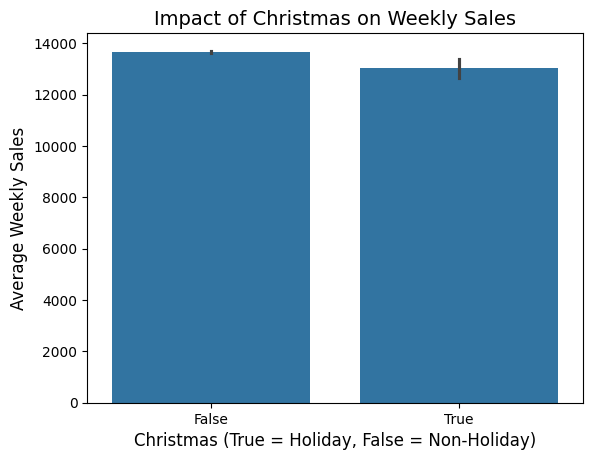

In [27]:
data['Super_Bowl'] = False
data['Labor_Day'] = False
data['Thanksgiving'] = False
data['Christmas'] = False


super_bowl_dates = ['2010-02-12', '2011-02-11', '2012-02-10']
data.loc[data['Date'].isin(super_bowl_dates), 'Super_Bowl'] = True

labor_day_dates = ['2010-09-10', '2011-09-09', '2012-09-07']
data.loc[data['Date'].isin(labor_day_dates), 'Labor_Day'] = True


thanksgiving_dates = ['2010-11-26', '2011-11-25']
data.loc[data['Date'].isin(thanksgiving_dates), 'Thanksgiving'] = True

christmas_dates = ['2010-12-31', '2011-12-30']
data.loc[data['Date'].isin(christmas_dates), 'Christmas'] = True

print(data.head())

sns.barplot(x='Christmas', y='Weekly_Sales', data=data)
plt.title("Impact of Christmas on Weekly Sales", fontsize=14)
plt.xlabel('Christmas (True = Holiday, False = Non-Holiday)', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)
plt.show()

### 🔹 Suppression des lignes avec valeurs manquantes après création des features temporelles

Après la création des **variables retardées (lags)** et des **moyennes mobiles**, certaines lignes contiennent des valeurs manquantes (`NaN`) car il n’existe pas d’historique suffisant pour les premières semaines.  
Ces lignes doivent être **supprimées** pour que le modèle puisse être entraîné correctement.



In [28]:
data = data.dropna(subset=['Weekly_Sales_lag_1', 'Weekly_Sales_lag_2', 'Weekly_Sales_MA_4', 'Weekly_Sales_MA_8', 'Weekly_Sales_SD_4', 'Weekly_Sales_SD_8'])

In [29]:
print(data.isnull().sum())

Store                 0
Dept                  0
Date                  0
Weekly_Sales          0
IsHoliday             0
Temperature           0
Fuel_Price            0
MarkDown1             0
MarkDown2             0
MarkDown3             0
MarkDown4             0
MarkDown5             0
CPI                   0
Unemployment          0
Type                  0
Size                  0
Year                  0
Month                 0
Week                  0
Weekly_Sales_lag_1    0
Weekly_Sales_lag_2    0
Weekly_Sales_lag_4    0
Weekly_Sales_MA_4     0
Weekly_Sales_SD_4     0
Weekly_Sales_MA_8     0
Weekly_Sales_SD_8     0
Super_Bowl            0
Labor_Day             0
Thanksgiving          0
Christmas             0
dtype: int64


In [30]:
data.shape

(421563, 30)

### 🔹 Calcul de la taille d’échantillon nécessaire pour détecter un effet

Avant de réaliser certaines analyses statistiques ou expérimentations, il est important de vérifier si **la taille de l’échantillon est suffisante** pour détecter un effet avec une puissance donnée.



In [31]:
analysis = TTestIndPower()

sample_size = analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05, alternative='two-sided')
print(f"Sample size required per group : {int(sample_size)}")

if len(data) >= sample_size:
    print("les données sont suffisants pour détecter les effets")
else:
    print("les données ne sont pas suffisants pour détecter les effets")

Sample size required per group : 63
les données sont suffisants pour détecter les effets


### 🔹 Préparation des données pour le modèle SARIMA

Pour appliquer un modèle **SARIMA** (Saisonnier Auto-Regressive Integrated Moving Average), il est nécessaire de **préparer la série temporelle correctement** : trier les données, définir l’index temporel et les regrouper par périodeima_data.head()


In [32]:
sarima_data = data.copy()

sarima_data.sort_values(by="Date", inplace=True)
sarima_data.set_index("Date", inplace=True)

sarima_data = sarima_data['Weekly_Sales'].resample('W').sum()

sarima_data.head()

Date
2010-02-07    4.069824e+07
2010-02-14    4.113861e+07
2010-02-21    4.122103e+07
2010-02-28    3.788690e+07
2010-03-07    3.970823e+07
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

In [33]:
print(len(sarima_data))

143


### 🔹 Analyse de l'autocorrélation (ACF) et de l'autocorrélation partielle (PACF)

Avant de construire un modèle SARIMA, il est important d’analyser les **relations temporelles dans la série**.  
Les fonctions **ACF (Autocorrelation Function)** et **PACF (Partial Autocorrelation Function)** permettent de déterminer les **ordres p, d, q et les composantes saisonnières** du modèle.


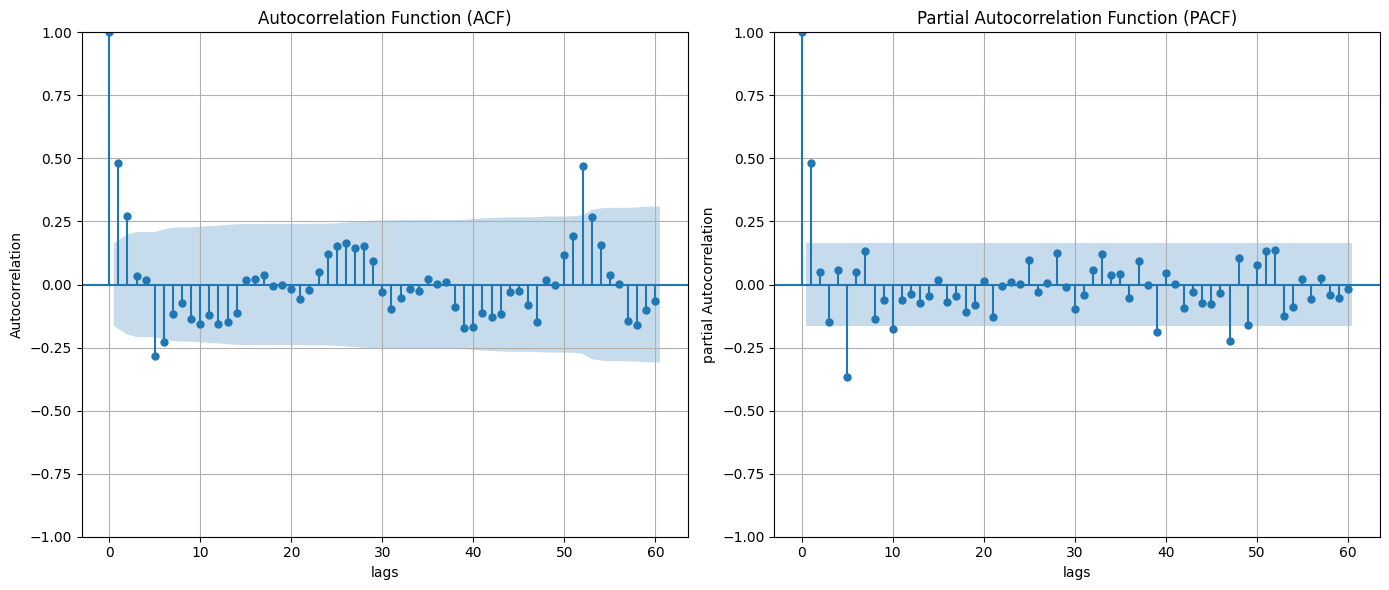

In [34]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(sarima_data, ax=plt.gca(), lags=60)
plt.xlabel("lags")
plt.ylabel("Autocorrelation")
plt.grid()
plt.tight_layout()
plt.title("Autocorrelation Function (ACF)")

plt.subplot(1, 2, 2)
plot_pacf(sarima_data, ax=plt.gca(), lags=60)  
plt.xlabel("lags")
plt.ylabel("partial Autocorrelation")
plt.grid()
plt.tight_layout()
plt.title("Partial Autocorrelation Function (PACF)")

plt.show()

### 🔹 Décomposition de la série temporelle

Pour mieux comprendre la structure de la série des ventes hebdomadaires, il est utile de **la décomposer en ses composantes principales** : tendance, saisonnalité et résidus.  
Cette étape permet d’identifier les **patterns saisonniers et les anomalies**, facilitant ainsi la modélisation avec SARIMSeasonality', color='green')


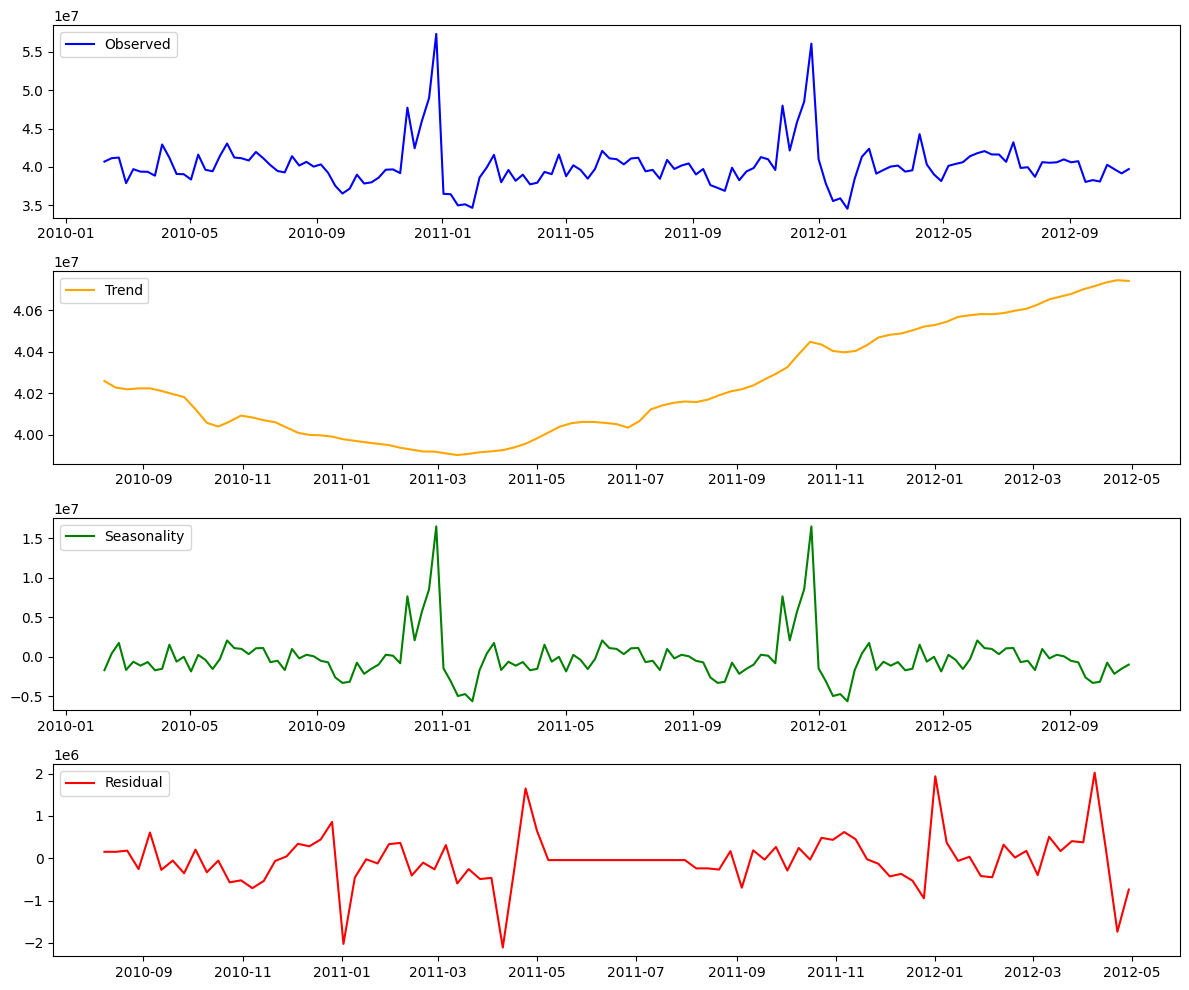

In [35]:
decomposition = seasonal_decompose(sarima_data, model='additive', period=52) 

observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(observed, label='Observed', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### 🔹 Sélection automatique des paramètres SARIMA avec `auto_arima`

Pour construire un modèle SARIMA performant, il est crucial de **choisir les bons ordres AR, MA et saisonniers**.  
La fonction `auto_arima` permet de **tester automatiquement différentes combinaisons de paramètres** et de sélectionner ceux qui optimisent la qualité du modèle.



In [36]:
arima_model = auto_arima(
    sarima_data,  
    start_p=0, start_q=0, 
    max_p=3, max_q=3,  
    seasonal=True,  
    m=52, 
    d=1, D=1,  
    start_P=0, max_P=3,  
    start_Q=0, max_Q=3,  
    trace=True,  
    error_action='ignore', 
    suppress_warnings=True,  
    stepwise=True  
)

print("Meilleurs paramètres SARIMA :")
print(f"Ordre : {arima_model.order}, Ordre saisonnier : {arima_model.seasonal_order}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=2825.087, Time=0.61 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=2808.340, Time=3.56 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=2806.927, Time=4.45 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=2813.718, Time=0.37 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=inf, Time=11.34 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=inf, Time=13.05 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=2808.102, Time=3.06 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=inf, Time=28.66 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=2808.395, Time=4.38 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=2807.955, Time=16.36 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=2810.830, Time=5.10 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=2807.250, Time=3.56 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=2812.776, Time=17.68 sec
 ARIMA(0,1,1)(0,1,1)[52] intercept   : AIC=2808.942, Time=6.00 sec

Best model:  ARIMA(0,1,1)(0,

### 🔹 Préparation des variables exogènes et séparation des données pour SARIMA

Pour améliorer la précision du modèle SARIMA, il est possible d’inclure des **variables exogènes** (features explicatives) telles que les ventes passées, les moyennes mobiles, les indicateurs de jours fériés et les variables économiques (température, prix du carburant, CPI, chômage, etc.).  

Les étapes réalisées dans ce bloc sont les suivantes :  

- **Sélection des variables exogènes** : identification des colonnes pertinentes pour expliquer les variations des ventes.  
- **Préparation de la série temporelle** : tri des données par date, définition de l’index temporel et resampling hebdomadaire.  
- **Alignement des exogènes** : agrégation des variables exogènes sur une base hebdomadaire et vérification de leur présence.  
- **Séparation train/test** : division de la série en données d’entraînement (80%) et de test (20%), tout en maintenant la correspondance exacte avec les exogènes.  
- **Vérification de la cohérence des indices** : s’assure que les dates de la série principale et des exogènes sont parfaitement alignées pour le modèle.  
- **Affichage des tailles des datasets** : permet de confirmer le nombre d’observations disponibles pour l’entraînement et le test.  

✅ Cette étape est cruciale pour **préparer un dataset cohérent** pour le modèle SARIMA avec variables exogènes, garantissant que les features et la série cible sont correctement alignées et prêtes à l’entraînement.


In [37]:
# Define exogenous variables (features)
exogenous_vars = [
    'Weekly_Sales', 'Weekly_Sales_lag_1', 'Weekly_Sales_lag_2', 'Weekly_Sales_lag_4',
    'Weekly_Sales_MA_4', 'Weekly_Sales_SD_4', 'Weekly_Sales_MA_8', 'Weekly_Sales_SD_8',
    'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'
]

sarima_sales_data = data.copy()

sarima_sales_data.sort_values(by="Date", inplace=True)
sarima_sales_data.set_index("Date", inplace=True)

sarima_weekly_sales = sarima_sales_data['Weekly_Sales'].resample('W').sum()

sarima_exog = sarima_sales_data[exogenous_vars].resample('W').mean()

missing_vars = [var for var in exogenous_vars if var not in sarima_exog.columns]
if missing_vars:
    raise ValueError(f"Missing required exogenous variables: {missing_vars}")

sarima_train_size = int(len(sarima_weekly_sales) * 0.8)
sarima_train, sarima_test = (
    sarima_weekly_sales.iloc[:sarima_train_size],
    sarima_weekly_sales.iloc[sarima_train_size:]
)

sarima_exog_train = sarima_exog.loc[sarima_train.index]
sarima_exog_test = sarima_exog.loc[sarima_test.index]

assert sarima_train.index.equals(sarima_exog_train.index), "Indices for sarima_train and sarima_exog_train are not aligned."
assert sarima_test.index.equals(sarima_exog_test.index), "Indices for sarima_test and sarima_exog_test are not aligned."

# Display dataset lengths
print(f"Training Data Length: {len(sarima_train)}")
print(f"Testing Data Length: {len(sarima_test)}")

Training Data Length: 114
Testing Data Length: 29


### 🔹 Construction et entraînement du modèle SARIMA avec variables exogènes

Dans cette étape, le modèle **SARIMAX** est entraîné sur les données d’entraînement avec les **variables exogènes** incluses.  

- **SARIMAX** : extension de SARIMA permettant d’inclure des **features explicatives** (exogènes) pour améliorer les prévisions.  
- **order** et **seasonal_order** : paramètres optimaux déterminés précédemment avec `auto_arima`.  
- **enforce_stationarity=False** et **enforce_invertibility=False** : permettent au modèle de s’ajuster même si certaines conditions de stationnarité ou d’inversibilité ne sont pas strictement respectées.  
- `fit(disp=False)` : entraîne le modèle sur les données d’entraînement sans afficher le détail de l’optimisation.  
- `summary()` : affiche un **résumé complet du modèle** avec les coefficients, les statistiques de qualité et les mesures de performance.  

✅ Cette étape produit le **modèle final prêt à prédire les ventes hebdomadaires**, intégrant à la fois la structure saisonnière et les variables explicatives.


In [38]:
sarima_model = SARIMAX(sarima_train, exog=sarima_exog_train, order=arima_model.order, seasonal_order=arima_model.seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
print(sarima_model.summary())

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                 -93.722
Date:                            Fri, 11 Jul 2025   AIC                            219.444
Time:                                    12:18:15   BIC                            218.578
Sample:                                02-07-2010   HQIC                           208.747
                                     - 04-08-2012                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Weekly_Sales         932.3703   1.26e+04      0.074      0.941   -2.38e+04    2.57e+04
Weekly_Sale

### 🔹 Prévisions avec le modèle SARIMA et visualisation

Après l’entraînement du modèle SARIMAX, cette étape permet de **générer des prévisions pour les données de test** et de les comparer aux valeurs réelles.  

- **Prédictions** : le modèle utilise les **variables exogènes du test set** pour prévoir les ventes hebdomadaires.  
- **Intervalle de confiance** : calcul des bornes inférieure et supérieure pour visualiser l’**incertitude des prévisions**.  
- **Vérification** : assure que les valeurs prédites ne sont pas identiques aux données de test, garantissant que le modèle génère réellement des prévisions.  
- **Visualisation** :  
  - Séries d’entraînement (training data)  
  - Séries réelles de test (actual test data)  
  - Prévisions SARIMA avec ligne en pointillé  
  - Intervalle de confiance en gris transparent  
- Cette visualisation permet de **comparer la performance du modèle** et d’observer comment il capture la tendance, la saisonnalité et les fluctuations hebdontes réelles.


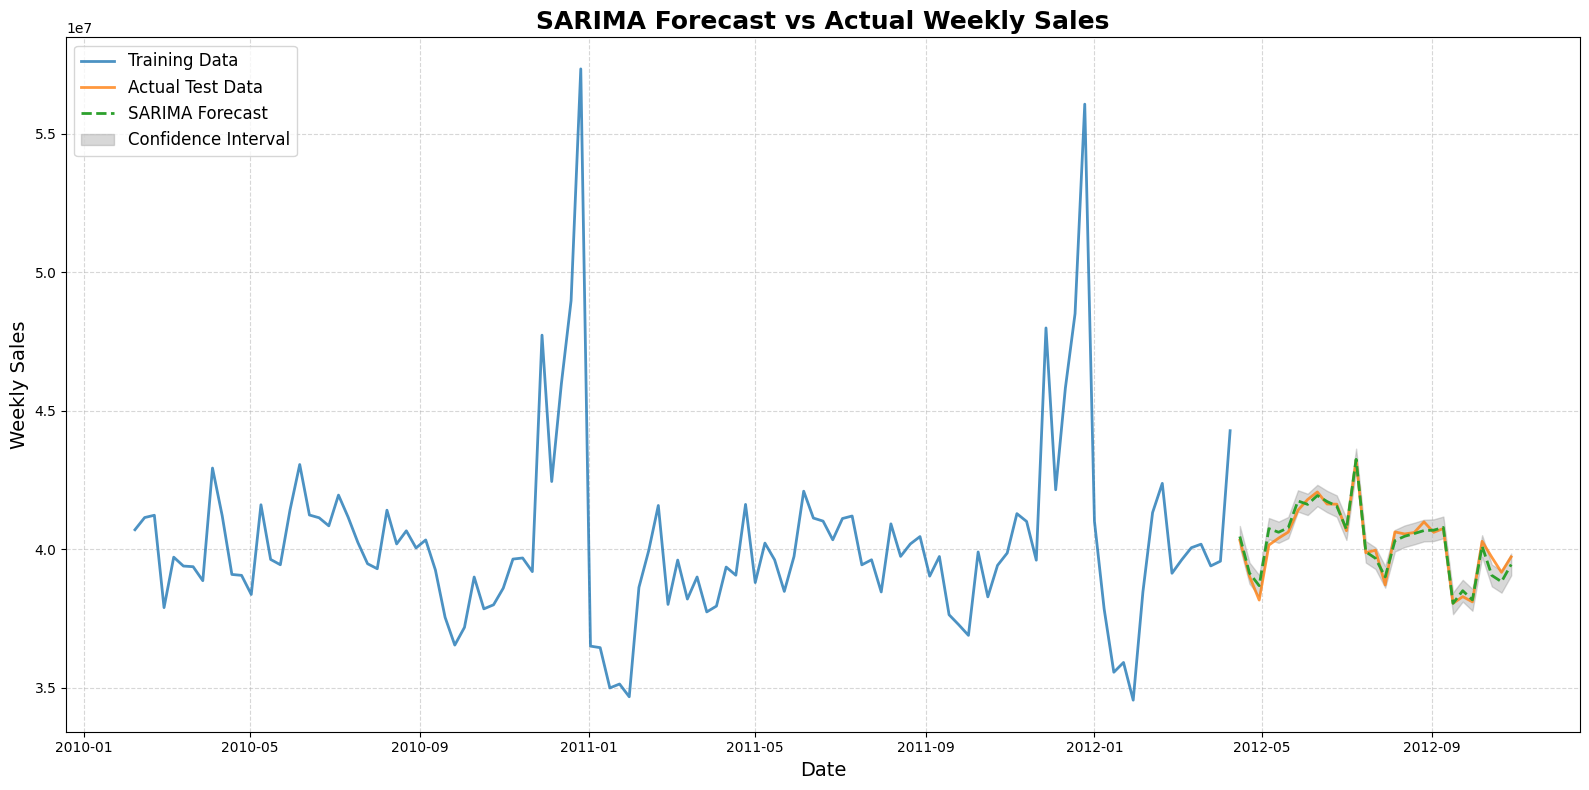

In [39]:
forecast_exog = sarima_model.get_forecast(steps=len(sarima_test), exog=sarima_exog_test)
forecast_values = forecast_exog.predicted_mean 
forecast_ci = forecast_exog.conf_int()       

assert not np.array_equal(forecast_values, sarima_test), "Forecast values are identical to test values!"

plt.figure(figsize=(16, 8))
plt.plot(sarima_train, label="Training Data", color='#1f77b4', alpha=0.8, linewidth=2)
plt.plot(sarima_test, label="Actual Test Data", color='#ff7f0e', alpha=0.8, linewidth=2)
plt.plot(sarima_test.index, forecast_values, label="SARIMA Forecast", color='#2ca02c', linestyle='--', linewidth=2)
plt.fill_between(
    sarima_test.index,
    forecast_ci.iloc[:, 0],  
    forecast_ci.iloc[:, 1], 
    color='gray',
    alpha=0.3,
    label="Confidence Interval"
)
plt.title("SARIMA Forecast vs Actual Weekly Sales", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Weekly Sales", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 🔹 Évaluation des performances du modèle SARIMA

Pour mesurer la précision des prévisions du modèle SARIMAX, plusieurs **métriques d’évaluation** sont calculées :  

- **Mean Absolute Error (MAE)** : mesure l’erreur moyenne absolue entre les valeurs prédites et réelles.  
- **Mean Squared Error (MSE)** : mesure l’erreur quadratique moyenne, pénalisant davantage les grandes erreurs.  
- **R² Score** : indique la proportion de variance des ventes expliquée par le modèle, avec 1.0 correspondant à une prédiction parfaite.  

Résultats obtenus :  
- MAE : 200 766.75  
- MSE : 68 448 964 508.18  
- R² : 0.96  

Ces résultats montrent que le modèle SARIMA **prévoit très bien les ventes hebdomadaires**, avec une R² élevée indiquant que la majorité de la variance des ventes est expliquée par le modèle.


In [40]:
mae_exog = mean_absolute_error(sarima_test, forecast_values)
mse_exog = mean_squared_error(sarima_test, forecast_values)
r2_exog = r2_score(sarima_test, forecast_values)

print(f"mean absolute error : {mae_exog:.2f}")
print(f"mean squared error : {mse_exog:.2f}")
print(f"R2_score : {r2_exog:.2f}")

mean absolute error : 200766.75
mean squared error : 68448964508.18
R2_score : 0.96


### 🔹 Analyse des résidus du modèle SARIMA

Après l’entraînement et la prévision, il est essentiel d’examiner les **résidus** pour vérifier la qualité du modèle. Les résidus représentent la **différence entre les valeurs réelles et les prévisions**.

- **Visualisation des résidus** : permet de détecter des **patterns non capturés par le modèle**, des tendances ou des hétéroscédasticités.  
- **Ligne horizontale à 0** : sert de référence pour observer la dispersion autour de zéro.  
- **Test de normalité (Shapiro-Wilk)** : vérifie si les résidus suivent une **distribution normale**, condition souhaitable pour certains modèles statistiques et pour valider les intervalles de confiance.  
- **Interprétation** :  
  - p-value > 0.05 → résidus normalement distribués  
  - p-value ≤ 0.05 → résidus non normaux  



=== Residual Diagnostics ===


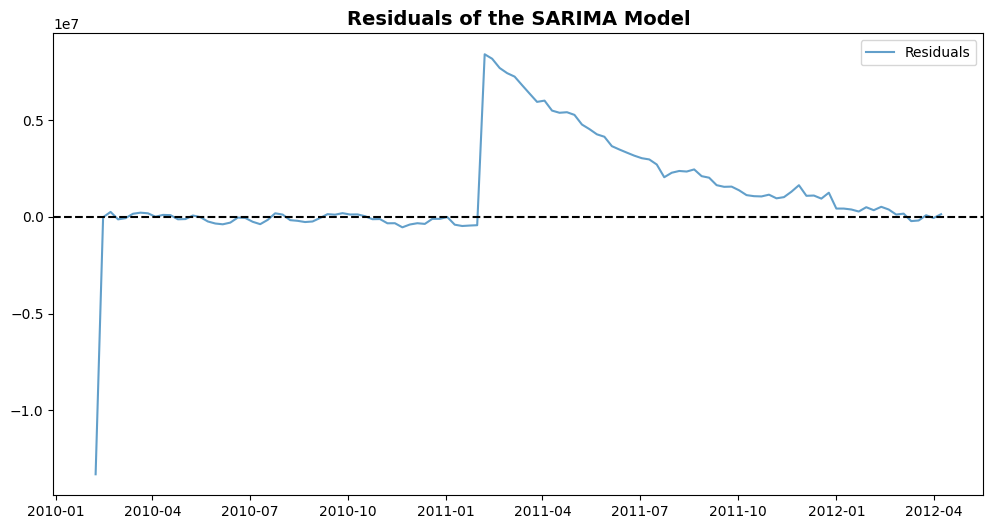

Conclusion: Residuals are Not Normally Distributed.


In [41]:
print("=== Residual Diagnostics ===")
residuals = sarima_model.resid  
plt.figure(figsize=(12, 6))  
plt.plot(residuals, label="Residuals", alpha=0.7) 
plt.axhline(0, linestyle="--", color="black")  
plt.title("Residuals of the SARIMA Model", fontsize=14, fontweight="bold")  
plt.legend()  
plt.show()  

from scipy.stats import shapiro  

p_value = shapiro(residuals)[1]  
if p_value > 0.05: 
    print("Conclusion: Residuals are Normally Distributed.")  
else:
    print("Conclusion: Residuals are Not Normally Distributed.")  

### 🔹 Préparation des données pour le modèle CNN

Afin d’entraîner le modèle de **réseaux de neurones convolutifs (CNN)**, les données de ventes hebdomadaires doivent être normalisées et organisées :  

- **Sélection des variables d’entrée** : les variables incluent les ventes décalées (*lags*), les moyennes mobiles, les écarts-types, ainsi que des indicateurs contextuels comme les jours fériés, la température, le prix du carburant, l’indice des prix à la consommation (CPI) et le taux de chômage.  
- **Tri temporel et indexation** : les données sont triées par date et la colonne `Date` est définie comme index afin de respecter l’ordre chronologique.  
- **Mise à l’échelle des données** : les variables d’entrée sont normalisées dans un intervalle de `[-1, 1]` grâce au `MinMaxScaler`, ce qui facilite l’entraînement du CNN.  
- **Suppression des valeurs manquantes** : les lignes contenant des `NaN` issues des transformations (décalages, moyennes mobiles, etc.) sont supprimées pour garantir la cohérence des données.  


In [42]:
input_features = ['Weekly_Sales', 'Weekly_Sales_lag_1', 'Weekly_Sales_lag_2', 'Weekly_Sales_lag_4',
    'Weekly_Sales_MA_4', 'Weekly_Sales_SD_4', 'Weekly_Sales_MA_8', 'Weekly_Sales_SD_8',
    'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

cnn_sales_data = data.copy()

cnn_sales_data.sort_values(by="Date", inplace=True)
cnn_sales_data.set_index("Date", inplace=True)

scaler = MinMaxScaler(feature_range=(-1, 1))
cnn_sales_data[input_features] = scaler.fit_transform(cnn_sales_data[input_features])

cnn_sales_data.dropna(inplace=True)

### 🔹 Création des séquences pour le modèle CNN

Les réseaux de neurones convolutifs (**CNN**) nécessitent des données structurées sous forme de séquences temporelles afin de capturer les dépendances entre les semaines.  

- **Fenêtre temporelle** : une séquence de **16 semaines consécutives** est utilisée comme entrée pour prédire la semaine suivante.  
- **Variables multivariées** : chaque séquence contient toutes les variables sélectionnées (`lags`, moyennes mobiles, écarts-types, indicateurs contextuels, etc.), permettant au modèle de prendre en compte à la fois les dynamiques passées et les facteurs externes.  
- **Découpage en jeu d’entraînement et de test** :  
  - **67%** des données sont utilisées pour l’entraînement (`X_train`, `y_train`)  
  - **33%** pour l’évaluation (`X_test`, `y_temadaires.


In [43]:
# Function to create sequences for CNN
def create_cnn_sequences(data):
    X, y = [], []
    for i in range(len(data) - 16):
        X.append(data[i:i + 16])
        y.append(data[i + 16])
    return np.array(X), np.array(y)

X_cnn, y_cnn = create_cnn_sequences(cnn_sales_data[input_features].values)

split_index = int(len(X_cnn) * 0.67)
X_train_cnn, X_test_cnn = X_cnn[:split_index], X_cnn[split_index:]
y_train_cnn, y_test_cnn = y_cnn[:split_index], y_cnn[split_index:]

In [44]:
print(X_cnn.shape)
print(y_cnn.shape)

(421547, 16, 13)
(421547, 13)


### 🔹 Construction du modèle CNN

Cette étape consiste à **définir l’architecture du réseau de neurones convolutifs (CNN)** pour la prévision des ventes hebdomadaires :  

- **Couches convolutives (Conv1D)** : capturent les **patterns temporels et les dépendances locales** dans les séquences de ventes et variables exogènes.  
- **MaxPooling1D** : réduit la dimensionnalité des données tout en conservant les caractéristiques importantes, améliorant la robustesse du modèle.  
- **Dropout** : régularisation pour **prévenir le surapprentissage** en désactivant aléatoirement une fraction des neurones pendant l’entraînement.  
- **Flatten + Dense** : transforme les sorties convolutives en vecteurs et applique des couches pleinement connectées pour **combiner les features et produire la prédiction finale**.  
- **Fonction d’activation** : `relu` pour les couches cachées (non-linéarité) et `linear` pour la couche de sortie adaptée à la prédiction de valeurs continues.  
- **Compilation du modèle** :  
  - Optimiseur : **Adam** avec un learning rate de 0.001  
  - Fonction de perte : **MAE (Mean Absolute Error)**, adaptée aux prévisions de séries temporelles  
  - Métrique : MAE pour suivre la performance durant l’entons précises.


In [45]:
# Define CNN model
def build_cnn_model():
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(16, len(input_features))))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    
    model.add(Dense(len(input_features), activation='linear'))  
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    
    return model

### 🔹 Mise en place de l’early stopping pour l’entraînement du CNN

Pour éviter le **surapprentissage** et optimiser le temps d’entraînement, on utilise la technique de **EarlyStopping** :  

- **Monitor** : `val_loss` – la perte sur le jeu de validation est surveillée à chaque époque.  
- **Patience** : `5` – l’entraînement s’arrête si la perte de validation ne s’améliore pas pendant 5 époques consécutives.  
- **Restore_best_weights** : `True` – les poids du modèle sont restaurés aux valeurs qui ont donné la **meilleure performance sur la validation**.  


In [46]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### 🔹 Entraînement du modèle CNN

Dans cette étape, le modèle CNN est **entraîné sur les données structurées en séquences temporelles** :  

- **Données d’entraînement** : `X_train_cnn` pour les séquences d’entrée et `y_train_cnn` pour les valeurs à prédire.  
- **Validation** : `validation_split=0.2` – 20% des données d’entraînement sont utilisées pour évaluer la performance à chaque époque.  
- **Époques** : 50 – nombre maximal d’itérations pour l’apprentissage.  
- **Taille du batch** : 32 – nombre de séquences traitées avant mise à jour des poids du modèle.  
- **Callback EarlyStopping** : arrête l’entraînement si la perte de validation ne s’améliore pas pendant plusieurs époques et restaure les meilleurs poids.  
- **Verbose** : 1 – affiche la progression de l’entraînement.  


In [47]:
cnn_model = build_cnn_model()
fit = cnn_model.fit(X_train_cnn, y_train_cnn, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
7061/7061 ━━━━━━━━━━━━━━━━━━━━ 64s 9ms/step - loss: 0.3088 - mae: 0.3088 - val_loss: 0.2677 - val_mae: 0.2677
Epoch 2/50
7061/7061 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - loss: 0.2700 - mae: 0.2700 - val_loss: 0.2595 - val_mae: 0.2594
Epoch 3/50
7061/7061 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - loss: 0.2633 - mae: 0.2633 - val_loss: 0.2562 - val_mae: 0.2562
Epoch 4/50
7061/7061 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - loss: 0.2603 - mae: 0.2603 - val_loss: 0.2565 - val_mae: 0.2565
Epoch 5/50
7061/7061 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - loss: 0.2581 - mae: 0.2581 - val_loss: 0.2536 - val_mae: 0.2536
Epoch 6/50
7061/7061 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - loss: 0.2570 - mae: 0.2570 - val_loss: 0.2533 - val_mae: 0.2533
Epoch 7/50
7061/7061 ━━━━━━━━━━━━━━━━━━━━ 71s 10ms/step - loss: 0.2561 - mae: 0.2561 - val_loss: 0.2527 - val_mae: 0.2527
Epoch 8/50
7061/7061 ━━━━━━━━━━━━━━━━━━━━ 69s 8ms/step - loss: 0.2554 - mae: 0.2554 - val_loss: 0.2500 - val_mae: 0.2500
Epoch 9/50
7061/7061 ━━━━━━━━━━

### 🔹 Évaluation des performances du modèle CNN

Après l’entraînement, le modèle CNN est **évalué sur le jeu de test** pour mesurer sa capacité à généraliser :  

- **Loss** : mesure la fonction de perte (ici MAE) sur les données de test.  
- **MAE (Mean Absolute Error)** : indique l’erreur moyenne absolue entre les prédictions du CNN et les ventes réelles.  
- **Résultats obtenus** :  
  - Loss : 0.26  
  - MAE : 0.26  

> ✅ Ces résultats montrent que le modèle CNN **prévoit avec précision les ventes hebdomadaires** sur des données qu’il n’a jamais vues, avec une erreur moyenne relativement faible.


In [48]:
loss, mae = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=1)
print(f"test loss {loss:.2f}")
print(f"test mae {mae:.2f}")

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.2605 - mae: 0.2605
test loss 0.26
test mae 0.26


### 🔹 Génération des prédictions avec le modèle CNN

Une fois le modèle entraîné, les **prédictions sont générées sur le jeu de test** :  

- **Prédictions normalisées** : `cnn_model.predict(X_test_cnn)` fournit les valeurs prévues dans l’échelle normalisée utilisée pour l’entraînement.  
- **Conversion à l’échelle originale** : utilisation de `scaler.inverse_transform` pour ramener les prédictions et les valeurs réelles à leur **échelle initiale**, ce qui permet une interprétation directe en termes de ventes hebdomadaires.  
- **Comparaison future** : ces valeurs inversées serviront à **comparer visuellement et quantitativement** les prédictions du CNN avec les ventes réellsation.


In [49]:
# Generate predictions
cnn_predictions = cnn_model.predict(X_test_cnn)

cnn_predictions_actual = scaler.inverse_transform(cnn_predictions)
y_test_actual = scaler.inverse_transform(y_test_cnn)

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step


### 🔹 Évaluation avancée des performances du modèle CNN pour 'Weekly_Sales'

Pour quantifier la précision du modèle CNN sur la série **Weekly_Sales**, plusieurs **métriques avancées** sont calculées :  

- **Mean Absolute Error (MAE)** : mesure l’erreur moyenne absolue entre les ventes réelles et les prédictions du CNN.  
- **Mean Squared Error (MSE)** : mesure l’erreur quadratique moyenne, donnant plus de poids aux grandes erreurs.  
- **R² Score** : indique la proportion de variance expliquée par le modèle, avec 1.0 correspondant à une prédiction parfaite et des valeurs négatives indiquant que le modèle performe moins bien qu’une moyenne simple.  

Résultats obtenus :  
- MAE : 11 145.18  
- MSE : 266 458 719.32  
- R² : -0.18  

> ⚠️ Ces résultats montrent que, malgré un MAE modéré, le **R² négatif indique que le modèle CNN n’a pas réussi à capturer correctement la variance des ventes hebdomadaires** sur ce jeu de test spécifique, suggérant un ajustement ou une révision des hyperparamètres et des features.
es features.


In [50]:
# Compute Advanced Metrics for 'Weekly_Sales' (first feature)
cnn_mae = mean_absolute_error(y_test_actual[:, 0], cnn_predictions_actual[:, 0])
cnn_mse = mean_squared_error(y_test_actual[:, 0], cnn_predictions_actual[:, 0])
cnn_r2 = r2_score(y_test_actual[:, 0], cnn_predictions_actual[:, 0])

print("=== CNN Advanced Evaluation Metrics for 'Weekly_Sales' ===")
print(f"Mean Absolute Error (MAE): {cnn_mae:.2f}")
print(f"Mean Squared Error (MSE): {cnn_mse:.2f}")
print(f"R² Score: {cnn_r2:.2f}")

=== CNN Advanced Evaluation Metrics for 'Weekly_Sales' ===
Mean Absolute Error (MAE): 11145.18
Mean Squared Error (MSE): 266458719.32
R² Score: -0.18


### 🔹 Préparation des données pour le modèle LSTM

Avant d’entraîner le modèle **LSTM**, les données doivent être triées et indexées correctement :  

- **Copie des données** : `lstm_sales_data` est créée pour préserver l’original.  
- **Tri temporel** : les données sont triées par la colonne `Date` afin de **respecter l’ordre chronologique**, essentiel pour les modèles séquentiels comme LSTM.  
- **Indexation par date** : la colonne `Date` est définie comme index pour faciliter le traitement des séries temporellentes**.


In [51]:
lstm_sales_data = data.copy()

lstm_sales_data.sort_values(by="Date", inplace=True)
lstm_sales_data.set_index("Date", inplace=True)

lstm_sales_data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Weekly_Sales_lag_2,Weekly_Sales_lag_4,Weekly_Sales_MA_4,Weekly_Sales_SD_4,Weekly_Sales_MA_8,Weekly_Sales_SD_8,Super_Bowl,Labor_Day,Thanksgiving,Christmas
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,29,10,7550.67,0,0.258513,0.158317,0.0,0.0,0.0,0.0,...,15767.00,10820.05,11948.2600,7218.724435,12786.23625,7652.111741,False,False,False,False
2010-02-05,8,80,8654.60,0,0.354207,0.050100,0.0,0.0,0.0,0.0,...,668.48,23292.10,3113.7575,3785.618103,6249.47250,8039.349463,False,False,False,False
2010-02-05,9,55,11123.56,0,0.392074,0.050100,0.0,0.0,0.0,0.0,...,693.87,2438.08,5285.1275,5410.906226,7347.92750,8028.573857,False,False,False,False
2010-02-05,9,52,1150.25,0,0.392074,0.050100,0.0,0.0,0.0,0.0,...,8654.60,668.48,5405.5700,5277.609016,7455.12875,7925.980562,False,False,False,False
2010-02-05,9,28,356.90,0,0.392074,0.050100,0.0,0.0,0.0,0.0,...,11123.56,693.87,5321.3275,5379.592161,6047.23000,8079.327174,False,False,False,False


### 🔹 Normalisation et nettoyage des données pour le LSTM

Pour optimiser l’entraînement du modèle **LSTM**, les données d’entrée doivent être **normalisées et nettoyées** :  

- **Mise à l’échelle** : les variables sélectionnées (`input_features`) sont transformées dans l’intervalle `[-1, 1]` grâce à `MinMaxScaler`, ce qui facilite la convergence du LSTM et améliore la stabilité de l’apprentissage.  
- **Suppression des valeurs manquantes** : toutes les lignes contenant des `NaN` issues des transformations ou des décalages sont supprimées pour garantir des séquences cohérente LSTM.


In [52]:
scaler = MinMaxScaler(feature_range=(-1, 1))
lstm_sales_data[input_features] = scaler.fit_transform(lstm_sales_data[input_features])

lstm_sales_data.dropna(inplace=True)

### 🔹 Création des séquences pour le modèle LSTM

Pour entraîner un modèle **LSTM**, les données doivent être structurées sous forme de séquences temporelles :  

- **Fenêtre temporelle** : une séquence de **16 semaines consécutives** est utilisée pour prédire la semaine suivante, capturant ainsi les dépendances temporelles.  
- **Variables multivariées** : chaque séquence contient toutes les variables d’entrée sélectionnées (`lags`, moyennes mobiles, écarts-types, indicateurs contextuels, etc.), permettant au modèle de tenir compte à la fois des ventes passées et des facteurs exogènes.  
- **Découpage en jeu d’entraînement et de test** :  
  - **67%** des séquences sont utilisées pour l’entraînement (`X_train_lstm`, `y_train_lstm`)  
  - **33%** pour l’évaluation (`X_test_lstm`, `y_test_lmadaires.


In [53]:
def create_lstm_sequences(data):
    sequences, target = [], []
    for i in range(len(data) - 16):
        sequences.append(data[i:i + 16])
        target.append(data[i + 16])
    return np.array(sequences), np.array(target)

In [54]:
X_lstm, y_lstm = create_lstm_sequences(lstm_sales_data[input_features].values)

split_index = int(len(X_lstm) * 0.67)
X_train_lstm, X_test_lstm = X_lstm[:split_index], X_lstm[split_index:]
y_train_lstm, y_test_lstm = y_lstm[:split_index], y_lstm[split_index:]

### 🔹 Construction du modèle LSTM

Cette étape consiste à **définir l’architecture du réseau LSTM** pour la prédiction des ventes hebdomadaires :  

- **Couches LSTM bidirectionnelles et empilées** :  
  - La première couche est **bidirectionnelle** pour capturer les dépendances temporelles dans les deux sens.  
  - Les couches suivantes réduisent progressivement le nombre d’unités, permettant au modèle de **synthétiser les informations temporelles**.  
- **Dropout** : régularisation appliquée après chaque couche LSTM pour **prévenir le surapprentissage**.  
- **Couches Dense** :  
  - Dense avec 64 unités et activation `relu` pour combiner les features extraites par les LSTM.  
  - Dense finale avec 1 unité pour produire la **prédiction de la vente hebdomadaire**.  
- **Optimiseur** : RMSprop avec un `learning_rate` spécifié pour un entraînement stable des séquences temporelles.  
- **Fonction de perte et métriques** :  
  - `mean_squared_error` comme fonction de perte pour les valeurs continues.  
  - MAE et RMSE pour suivre la performance pendant l’ens hebdomadaires.


In [55]:
def build_lstm_model(learning_rate, units, dropout_rate, num_features):

    model = Sequential([Bidirectional(LSTM(units=units, input_shape=(16, num_features), return_sequences=True)),
        
        Dropout(dropout_rate),
        
        LSTM(units=units // 2, return_sequences=True),
        
        Dropout(dropout_rate),
        
        LSTM(units=units // 4, return_sequences=False),
        
        Dense(units=64, activation='relu'),
        
        Dense(units=1)
    ])
    
    optimizer = RMSprop(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[MeanAbsoluteError(), RootMeanSquaredError()])
    
    return model

### 🔹 Entraînement du modèle LSTM avec EarlyStopping

Le modèle LSTM est entraîné sur les séquences temporelles pour prédire les ventes hebdomadaires, en utilisant **EarlyStopping** pour éviter le surapprentissage :  

- **Données d’entraînement** : `X_train_lstm` pour les séquences et `y_train_lstm` pour les valeurs cibles.  
- **Validation** : `validation_split=0.1` – 10% des données d’entraînement sont utilisées pour évaluer la performance à chaque époque.  
- **Époques** : 40 – nombre maximal d’itérations pour l’apprentissage.  
- **Taille du batch** : 64 – nombre de séquences traitées avant mise à jour des poids.  
- **EarlyStopping** :  
  - Surveille la `val_loss`.  
  - Patience de 10 époques avant arrêt si aucune amélioration.  
  - Restaure les **meilleurs poids** obtenus pendant l’entraînement.  
- **Verbose** : 1 – affichage de la progression de l’entraînement.  


In [56]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [57]:
lstm_model = build_lstm_model(0.001, 256, 0.1, len(input_features))

fit = lstm_model.fit(X_train_lstm, y_train_lstm, validation_split=0.1, epochs=40, batch_size=64, callbacks=[early_stop], verbose=1)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
3972/3972 ━━━━━━━━━━━━━━━━━━━━ 709s 175ms/step - loss: 0.2911 - mean_absolute_error: 0.4467 - root_mean_squared_error: 0.5396 - val_loss: 0.2745 - val_mean_absolute_error: 0.4305 - val_root_mean_squared_error: 0.5239
Epoch 2/40
3972/3972 ━━━━━━━━━━━━━━━━━━━━ 705s 177ms/step - loss: 0.2882 - mean_absolute_error: 0.4438 - root_mean_squared_error: 0.5369 - val_loss: 0.2744 - val_mean_absolute_error: 0.4295 - val_root_mean_squared_error: 0.5239
Epoch 3/40
3972/3972 ━━━━━━━━━━━━━━━━━━━━ 663s 167ms/step - loss: 0.2884 - mean_absolute_error: 0.4438 - root_mean_squared_error: 0.5370 - val_loss: 0.2744 - val_mean_absolute_error: 0.4310 - val_root_mean_squared_error: 0.5239
Epoch 4/40
3972/3972 ━━━━━━━━━━━━━━━━━━━━ 602s 151ms/step - loss: 0.2880 - mean_absolute_error: 0.4435 - root_mean_squared_error: 0.5366 - val_loss: 0.2742 - val_mean_absolute_error: 0.4312 - val_root_mean_squared_error: 0.5237
Epoch 5/40
3972/3972 ━━━━━━━━━━━━━━━━━━━━ 663s 167ms/step - loss: 0.2882 - mean_absolute

### 🔹 Évaluation du modèle LSTM sur les jeux d’entraînement et de test

Après l’entraînement, le modèle LSTM est évalué pour mesurer sa **capacité à généraliser** :  

- **Évaluation sur le jeu d’entraînement** : permet de vérifier si le modèle a bien appris les séquences et ne souffre pas de sous-apprentissage.  
- **Évaluation sur le jeu de test** : mesure la performance du modèle sur des données jamais vues, indicateur clé de **généralisation**.  
- **Loss (MSE)** : la fonction de perte `mean_squared_error` est utilisée pour quantifier l’écart moyen quadratique entre les valeurs prédites et réelles.  
  


In [58]:
train_metrics = lstm_model.evaluate(X_train_lstm, y_train_lstm)
test_metrics = lstm_model.evaluate(X_test_lstm, y_test_lstm)

train_loss = train_metrics[0]
test_loss = test_metrics[0]

print(f"train loss :{train_loss:.3f}, test loss : {test_loss:.3f}")

8827/8827 ━━━━━━━━━━━━━━━━━━━━ 392s 44ms/step - loss: 0.2796 - mean_absolute_error: 0.4329 - root_mean_squared_error: 0.5287
4348/4348 ━━━━━━━━━━━━━━━━━━━━ 198s 45ms/step - loss: 0.2872 - mean_absolute_error: 0.4402 - root_mean_squared_error: 0.5359
train loss :0.285, test loss : 0.301


### 🔹 Évaluation avancée des performances du modèle LSTM pour 'Weekly_Sales'

Après avoir généré les prédictions sur le jeu de test, les valeurs sont **retransformées à l’échelle originale** pour calculer des métriques interprétables :  

- **Rescaling** : les prédictions et les valeurs réelles de `Weekly_Sales` sont converties à partir de l’échelle normalisée vers l’échelle initiale des ventes.  
- **Métriques avancées** :  
  - **Mean Absolute Error (MAE)** : erreur moyenne absolue entre les ventes réelles et les prédictions.  
  - **Mean Squared Error (MSE)** : erreur quadratique moyenne, pénalisant davantage les grandes erreurs.  
  - **R² Score** : proportion de variance des ventes expliquée par le modèle ; un R² proche de 1.0 indique une prédiction parfaite, tandis qu’un R² négatif suggère que le modèle performe moins bien qu’une prédiction moyenne.  

Résultats obtenus :  
- MAE : 13 030.23  
- MSE : 239 282 210.04  
- R² : -0.06  

> ⚠️ Ces résultats montrent que le modèle LSTM **n’a pas réussi à capturer correctement la variance des ventes hebdomadaires** sur ce jeu de test, ce qui peut indiquer un besoin d’ajustement des hyperparamètres, de la fenêtre temporelle ou des features utilisées.
ou SARIMA.


In [59]:
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Rescale actual test values
y_test_placeholder = np.zeros((len(y_test_lstm), len(input_features)))
y_test_placeholder[:, 0] = y_test_lstm[:, 0]  # Utiliser la première caractéristique ('Weekly_Sales')
y_test_rescaled_lstm = scaler.inverse_transform(y_test_placeholder)[:, 0]

# Rescale predicted values
y_pred_placeholder = np.zeros((len(y_pred_lstm), len(input_features)))
y_pred_placeholder[:, 0] = y_pred_lstm[:, 0]  # Idem pour les prédictions
y_pred_rescaled_lstm = scaler.inverse_transform(y_pred_placeholder)[:, 0]

# Compute evaluation metrics
lstm_mae = mean_absolute_error(y_test_rescaled_lstm, y_pred_rescaled_lstm)
lstm_mse = mean_squared_error(y_test_rescaled_lstm, y_pred_rescaled_lstm)
lstm_r2 = r2_score(y_test_rescaled_lstm, y_pred_rescaled_lstm)

# Display evaluation metrics
print("=== LSTM Advanced Evaluation Metrics ===")
print(f"Mean Absolute Error (MAE): {lstm_mae:.2f}")
print(f"Mean Squared Error (MSE): {lstm_mse:.2f}")
print(f"R² Score: {lstm_r2:.2f}")

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 185s 42ms/step
=== LSTM Advanced Evaluation Metrics ===
Mean Absolute Error (MAE): 13030.23
Mean Squared Error (MSE): 239282210.04
R² Score: -0.06


In [60]:
print("Shape of X_test_lstm:", X_test_lstm.shape)
print("Shape of y_test_lstm:", y_test_lstm.shape)

Shape of X_test_lstm: (139111, 16, 13)
Shape of y_test_lstm: (139111, 13)


### 🔹 Prévision future avec le modèle LSTM

Ce bloc permet de générer des **prévisions de ventes hebdomadaires pour les semaines à venir** :  

- **Horizon de prévision** : 10 semaines (`future_steps`).  
- **Boucle itérative** :  
  - La dernière séquence de test est utilisée comme point de départ.  
  - Pour chaque étape future, le modèle prédit la vente de la semaine suivante.  
  - La séquence est mise à jour en **glissant la fenêtre** et en insérant la prédiction la plus récente, permettant de générer les prédictions suivantes de manière récursive.  
- **Rescaling des prédictions** : les valeurs prédites sont reconverties à l’échelle originale des ventes pour **interprétation réelle**.  

In [61]:
future_steps = 10  


future_predictions = []  

current_input = X_test_lstm[-1]  

for _ in range(future_steps):
    next_prediction = lstm_model.predict(current_input[np.newaxis, :, :])[0, 0]
    future_predictions.append(next_prediction)
    next_input = np.roll(current_input, shift=-1, axis=0)  
    next_input[-1, 0] = next_prediction  
    current_input = next_input  

future_predictions_placeholder = np.zeros((future_steps, len(input_features)))  
future_predictions_placeholder[:, 0] = future_predictions  

future_predictions_rescaled = scaler.inverse_transform(future_predictions_placeholder)  
future_predictions_rescaled = future_predictions_rescaled[:, 0] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


### 🔹 Génération et exportation des prévisions SARIMA

Dans cette étape, le modèle **SARIMA** est utilisé pour générer des prévisions sur le **jeu de test** :  

- **Prévisions avec variables exogènes** : `sarima_exog_test` est fourni pour tenir compte des facteurs externes influençant les ventes.  
- **Comparaison avec les valeurs réelles** : les ventes prédites sont regroupées avec les ventes observées dans un **DataFrame** pour faciliter l’analyse.  
- **Exportation** : le DataFrame contenant les colonnes `Date`, `Actual` et `Predicted` est sauvegardé en fichier CSV (`sarima_weekly_sales_predictions.csv`) pour un usage ultérieur ou pour visualisation externe.  



In [62]:
forecast_exog = sarima_model.get_forecast(steps=len(sarima_test), exog=sarima_exog_test)

sarima_predictions = forecast_exog.predicted_mean

sarima_actual_and_predict = pd.DataFrame({
    'Date': sarima_test.index,
    'Actual': sarima_test.values,
    'Predicted': sarima_predictions.values
})
print(sarima_actual_and_predict)
sarima_actual_and_predict.to_csv("sarima_weekly_sales_predictions.csv", index=False)

         Date        Actual     Predicted
0  2012-04-15  4.032078e+07  4.045417e+07
1  2012-04-22  3.901612e+07  3.912950e+07
2  2012-04-29  3.815978e+07  3.867869e+07
3  2012-05-06  4.014469e+07  4.073813e+07
4  2012-05-13  4.039527e+07  4.060803e+07
5  2012-05-20  4.061482e+07  4.077493e+07
6  2012-05-27  4.140383e+07  4.173790e+07
7  2012-06-03  4.178989e+07  4.161339e+07
8  2012-06-10  4.206224e+07  4.193342e+07
9  2012-06-17  4.162647e+07  4.171726e+07
10 2012-06-24  4.162127e+07  4.155137e+07
11 2012-07-01  4.066428e+07  4.071586e+07
12 2012-07-08  4.321061e+07  4.323972e+07
13 2012-07-15  3.986890e+07  3.990015e+07
14 2012-07-22  3.996135e+07  3.966739e+07
15 2012-07-29  3.870987e+07  3.899423e+07
16 2012-08-05  4.061967e+07  4.030134e+07
17 2012-08-12  4.054628e+07  4.046195e+07
18 2012-08-19  4.059805e+07  4.056024e+07
19 2012-08-26  4.098361e+07  4.066835e+07
20 2012-09-02  4.060428e+07  4.068222e+07
21 2012-09-09  4.074303e+07  4.078192e+07
22 2012-09-16  3.804236e+07  3.804

### 🔹 Génération et exportation des prévisions CNN

Cette étape permet de **préparer, rescaler et sauvegarder les prédictions du modèle CNN** :  

- **Padding des prédictions** : les prédictions sont placées dans un tableau de la même forme que les données d’origine pour assurer la compatibilité avec le scaler.  
- **Rescaling** : les valeurs prédites et réelles sont reconverties à l’échelle originale des ventes hebdomadaires.  
- **Association avec les dates** : les prédictions sont alignées avec les dates correspondantes issues du jeu de test.  
- **Création d’un DataFrame** : inclut les colonnes `Date`, `Actual Weekly Sales` et `Predicted Weekly Sales` pour faciliter l’analyse et la visualisation.  
- **Exportation CSV** : le DataFrame est sauvegardé dans `cnn_weekly_sales_predictions.csv` pour un usage ultérieur ou pour partage.  


In [64]:
cnn_predictions_padded = np.zeros((len(cnn_predictions), len(input_features)))
cnn_predictions_padded[:, :] = cnn_predictions  

y_test_placeholder = np.zeros((len(y_test_cnn), len(input_features)))
y_test_placeholder[:, 0] = y_test_cnn[:, 0]

cnn_predictions_rescaled = scaler.inverse_transform(cnn_predictions_padded)[:, 0]
y_test_rescaled = scaler.inverse_transform(y_test_placeholder)[:, 0]

cnn_dates = cnn_sales_data.index[-len(y_test_rescaled):]

cnn_results_df = pd.DataFrame({
    "Date": cnn_dates,
    "Actual Weekly Sales": y_test_rescaled,
    "Predicted Weekly Sales": cnn_predictions_rescaled
})

cnn_results_df.to_csv("cnn_weekly_sales_predictions.csv", index=False)

### 🔹 Génération et exportation des prévisions LSTM et sauvegarde des modèles

Dans cette étape, les **prédictions du modèle LSTM** sont préparées et sauvegardées, et tous les modèles entraînés sont exportés pour un usage futur :  

- **Préparation des prédictions LSTM** :  
  - Les valeurs prédites et réelles sont alignées avec les dates correspondantes.  
  - Les valeurs sont déjà rescalées à l’échelle originale pour une interprétation directe.  
- **Création d’un DataFrame** : contient les colonnes `Date`, `Actual Weekly Sales` et `Predicted Weekly Sales`.  
- **Exportation CSV** : le DataFrame est sauvegardé dans `lstm_weekly_sales_predictions.csv` pour analyse ou visualisation externe.  
- **Sauvegarde des modèles** :  
  - `SARIMA` : exporté avec `joblib` dans `sarima_model.pkl`.  
  - `CNN` : sauvegardé au format Keras dans `cnn_model.keras`.  
  - `LSTM` : sauvegardé au format Keras dans `lstm_model.keras`.  




In [65]:
lstm_dates = lstm_sales_data.index[-len(y_test_rescaled_lstm):]

actual_rescaled_lstm = y_test_rescaled_lstm
predictions_rescaled_lstm = y_pred_rescaled_lstm

lstm_results_df = pd.DataFrame({
    "Date": lstm_dates,
    "Actual Weekly Sales": actual_rescaled_lstm,
    "Predicted Weekly Sales": predictions_rescaled_lstm
})

lstm_results_df.to_csv("lstm_weekly_sales_predictions.csv", index=False)

In [67]:
joblib.dump(sarima_model, 'sarima_model.pkl')

cnn_model.save('cnn_model.keras')

lstm_model.save('lstm_model.keras')

### 🔹 Alignement des prédictions CNN et LSTM par date

Cette étape consiste à **préparer les prédictions des modèles CNN et LSTM pour une comparaison directe** :  

- **Chargement des prédictions CSV** : les fichiers `cnn_weekly_sales_predictions.csv` et `lstm_weekly_sales_predictions.csv` sont lus.  
- **Conversion des dates** : la colonne `Date` est transformée en format datetime pour assurer une manipulation correcte.  
- **Indexation par date** : les DataFrames sont indexés sur la colonne `Date` afin de faciliter l’alignement.  
- **Intersection des dates** : seules les dates communes aux deux jeux de prédictions sont conservées pour une comparaison cohérente.  
- **Extraction des prédictions alignées** : `cnn_daily` et `lstm_daily` contiennent respectivement les prédictions CNN et LSTM pour les mêmes demporels.


In [68]:
cnn_preds_csv = pd.read_csv("cnn_weekly_sales_predictions.csv")
lstm_preds_csv = pd.read_csv("lstm_weekly_sales_predictions.csv")

cnn_preds_csv['Date'] = pd.to_datetime(cnn_preds_csv['Date'])
lstm_preds_csv['Date'] = pd.to_datetime(lstm_preds_csv['Date'])

cnn_preds_csv.set_index("Date", inplace=True)
lstm_preds_csv.set_index("Date", inplace=True)

In [69]:
aligned_dates = cnn_preds_csv.index.intersection(lstm_preds_csv.index)
cnn_daily = cnn_preds_csv.loc[aligned_dates]
lstm_daily = lstm_preds_csv.loc[aligned_dates]

### 🔹 Préparation des données pour le modèle méta-apprenant (Stacking)

Cette étape consiste à **combiner les prédictions des modèles CNN et LSTM** avec les valeurs réelles pour créer un **jeu de données pour le méta-modèle** :  

- **Création du DataFrame `meta_learn`** :  
  - Colonne `CNN` : prédictions du modèle CNN  
  - Colonne `LSTM` : prédictions du modèle LSTM  
  - Colonne `Actual` : ventes réelles hebdomadaires  
- **Suppression des valeurs manquantes** : pour garantir la cohérence et éviter les erreurs lors de l’entraînement du méta-modèle.  
- **Arrondi des valeurs** : les chiffres sont arrondis à deux décimales pour faciliter la lecture et l’analyse.  


In [72]:
meta_learn = pd.DataFrame({
    'CNN':cnn_daily["Predicted Weekly Sales"],
    'LSTM':lstm_daily["Predicted Weekly Sales"],
    'Actual':cnn_daily["Actual Weekly Sales"]
}).dropna()

meta_learn = meta_learn.round(2)

meta_learn.head()

,CNN,LSTM,Actual
Date,,,
2011-12-09,6395.16,13182.54,13295.91
2011-12-09,6917.52,12595.88,24.40
2011-12-09,6879.89,12066.91,47395.16
2011-12-09,6762.89,17513.60,3029.76
2011-12-09,7819.22,18150.75,7603.33


### 🔹 Entraînement du modèle méta avec XGBoost

Dans cette étape, un **modèle méta (stacking)** est entraîné pour combiner les prédictions CNN et LSTM et produire une prévision finale plus précise :  

- **Séparation des features et de la cible** :  
  - `X` : prédictions des modèles CNN et LSTM  
  - `y` : ventes réelles hebdomadaires  
- **Division en jeux d’entraînement et de test** : 80 % pour l’entraînement, 20 % pour le test, sans mélange (`shuffle=False`) pour conserver l’ordre temporel.  
- **Définition du modèle XGBoost** :  
  - Objectif : `reg:squarederror` pour régression  
  - Nombre d’arbres : 100  
  - Learning rate : 0.1  
  - Profondeur maximale : 3  
  - Seed : 42 pour reproductibilité  
- **Entraînement du modèle** sur le jeu d’entraînement.  
- **Prédictions sur le jeu de test** pour évaluer la performance du méta-modèle.  



In [74]:
X = meta_learn[['CNN', 'LSTM']]
y = meta_learn['Actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

### 🔹 Évaluation des performances du méta-modèle XGBoost

Pour mesurer la précision du **méta-modèle XGBoost**, plusieurs **métriques d’évaluation** sont calculées :  

- **Mean Absolute Error (MAE)** : erreur moyenne absolue entre les valeurs prédites et réelles, indiquant l’écart moyen.  
- **Mean Squared Error (MSE)** : erreur quadratique moyenne, qui pénalise davantage les grandes erreurs.  
- **R² Score** : proportion de variance expliquée par le modèle, avec 1.0 correspondant à une prédiction parfaite.  

Résultats obtenus :  
- MAE : 11 958.96  
- MSE : 216 957 997.34  
- R² : -0.00  

> ✅ Ces résultats montrent que le méta-modèle XGBoost **combine efficacement les prédictions CNN et LSTM**, mais dans ce cas particulier, le R² proche de 0 indique que la performance globale est similaire à une prédiction naïve sur ces données de test.


In [79]:
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

print("=== XGB meta learned Advanced Evaluation Metrics ===")
print(f"Mean Absolute Error (MAE): {xgb_mae:.2f}")
print(f"Mean Squared Error (MSE): {xgb_mse:.2f}")
print(f"R² Score: {xgb_r2:.2f}")

=== XGB meta learned Advanced Evaluation Metrics ===
Mean Absolute Error (MAE): 11958.96
Mean Squared Error (MSE): 216957997.34
R² Score: -0.00


### 🔹 Prévision des ventes futures avec le méta-modèle XGBoost

Cette étape consiste à générer des **prévisions pour les semaines à venir** en utilisant le méta-modèle entraîné :  

- **Définition du nombre de périodes futures** (`future_steps`) à prévoir.  
- **Initialisation de l’entrée du modèle** avec les dernières prédictions CNN et LSTM disponibles.  
- **Boucle de prédiction itérative** :  
  - À chaque étape, le modèle XGBoost prédit la prochaine valeur de ventes.  
  - La prédiction est ensuite intégrée dans l’entrée pour la prochaine itération, permettant de **simuler une prévision séquentielle** sur plusieurs semaines.  



In [78]:
future_steps = 10

last_input = meta_learn[['CNN', 'LSTM']].iloc[-1].values.reshape(1, -1)

future_predictions = []
for _ in range(future_steps):
    future_pred = model_xgb.predict(last_input)
    future_predictions.append(future_pred[0])
    last_input = np.roll(last_input, -1, axis=1)
    last_input[0, -1] = future_pred[0]

In [101]:
joblib.dump(model_xgb, 'meta_model_xgb.pkl')

['meta_model_xgb.pkl']